In [51]:
import pandas as pd
import json
pd.set_option('display.max_columns', None)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [6]:
# Load your datasets
data = pd.read_excel('../../data/globalterrorismdb_0522dist.xlsx')
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Na

In [11]:
# number of unique country 
print("nomnre de pays unique", data['country_txt'].nunique())

nomnre de pays unique 204


In [44]:
data_filtered = data[data['iyear'] >= 1970]



In [74]:
attacks_per_year_country = data_filtered.groupby(['iyear', 'country_txt']).size().reset_index(name='num_attacks')

mean_attacks_per_country = attacks_per_year_country.groupby('country_txt')['num_attacks'].mean().reset_index()
mean_attacks_per_country.rename(columns={'num_attacks': 'mean_attacks'}, inplace=True)

attacks_per_year_country = attacks_per_year_country.merge(mean_attacks_per_country, on='country_txt')

attacks_per_year_country['deviation'] = attacks_per_year_country['num_attacks'] - attacks_per_year_country['mean_attacks']
attacks_per_year_country.head()



,iyear,country_txt,num_attacks,mean_attacks,deviation
0,1970,Argentina,21,19.209302,1.790698
1,1970,Australia,1,3.636364,-2.636364
2,1970,Belgium,1,4.351351,-3.351351
3,1970,Bolivia,1,10.187500,-9.187500
4,1970,Brazil,6,7.195122,-1.195122


In [80]:
highest_mean_attacks = mean_attacks_per_country.nlargest(20, 'mean_attacks')
print("20 Countries with Highest Mean Attacks:")
print(highest_mean_attacks)

20 Countries with Highest Mean Attacks:
        country_txt  mean_attacks
84             Iraq    688.025000
0       Afghanistan    540.571429
134        Pakistan    337.043478
80            India    309.533333
199           Yemen    215.250000
52      El Salvador    212.800000
35         Colombia    185.729167
140     Philippines    168.795918
130         Nigeria    168.181818
159         Somalia    139.921053
102           Libya    139.166667
139            Peru    138.886364
187  United Kingdom    110.260000
174           Syria     99.900000
178        Thailand     95.477273
182          Turkey     91.530612
2           Algeria     83.424242
147          Russia     80.071429
166       Sri Lanka     76.025000
185         Ukraine     75.750000


In [83]:
highest_deviation = attacks_per_year_country.nlargest(50, 'deviation')
print("50 Countries with Highest Deviation:")
highest_deviation[['country_txt', 'iyear', 'num_attacks', 'mean_attacks', 'deviation']]

50 Countries with Highest Deviation:


,country_txt,iyear,num_attacks,mean_attacks,deviation
3390,Iraq,2014,3934,688.025000,3245.975000
3593,Iraq,2016,3395,688.025000,2706.975000
3298,Iraq,2013,2852,688.025000,2163.975000
3968,Afghanistan,2020,2604,540.571429,2063.428571
3489,Iraq,2015,2751,688.025000,2062.975000
3321,Pakistan,2013,2215,337.043478,1877.956522
3695,Iraq,2017,2548,688.025000,1859.975000
3419,Pakistan,2014,2149,337.043478,1811.956522
3451,Afghanistan,2015,1928,540.571429,1387.428571
3229,Pakistan,2012,1655,337.043478,1317.956522


In [84]:
# Filtrer pour ne garder que les déviations positives
positive_deviations = attacks_per_year_country[attacks_per_year_country['deviation'] > 0]

# Optionnel : trier les résultats par déviation pour voir les plus fortes en premier
positive_deviations_sorted = positive_deviations.sort_values(by='deviation', ascending=False)

# Afficher les résultats
print("Pays avec des déviations positives (indiquant un potentiel conflit) :")
positive_deviations_sorted[['country_txt', 'iyear', 'num_attacks', 'mean_attacks', 'deviation']]


Pays avec des déviations positives (indiquant un potentiel conflit) :


,country_txt,iyear,num_attacks,mean_attacks,deviation
3390,Iraq,2014,3934,688.025000,3245.975000
3593,Iraq,2016,3395,688.025000,2706.975000
3298,Iraq,2013,2852,688.025000,2163.975000
3968,Afghanistan,2020,2604,540.571429,2063.428571
3489,Iraq,2015,2751,688.025000,2062.975000
...,...,...,...,...,...
378,Namibia,1978,8,7.947368,0.052632
3576,Ecuador,2016,6,5.975610,0.024390
1003,Ecuador,1987,6,5.975610,0.024390
1731,Ecuador,1995,6,5.975610,0.024390


In [102]:
# Filtrer les déviations positives
positive_deviations = attacks_per_year_country[attacks_per_year_country['deviation'] > 0]

# Regrouper par pays et année et calculer la somme des déviations positives
conflict_signs = positive_deviations.groupby(['country_txt', 'iyear']).agg(
    total_positive_deviation=('deviation', 'sum')
).reset_index()

# Créer un DataFrame pour suivre le cumul des années avec des déviations positives
conflict_signs['num_years_with_positive_deviation'] = (
    conflict_signs.groupby('country_txt').cumcount() + 1
)

# Remplacer les NaN par 0 pour les années sans déviations positives
conflict_signs['num_years_with_positive_deviation'] = conflict_signs['num_years_with_positive_deviation'].fillna(0)

# Afficher les résultats, en gardant uniquement les pays avec des déviations positives élevées
threshold = 200  # Remplacer par la valeur souhaitée pour filtrer les déviations positives
high_conflict_countries = conflict_signs[conflict_signs['total_positive_deviation'] > threshold]

# Afficher les résultats
print("Pays avec des déviations positives élevées indiquant un potentiel conflit :")
high_conflict_countries.sort_values(by='num_years_with_positive_deviation', ascending=False)


Pays avec des déviations positives élevées indiquant un potentiel conflit :


,country_txt,iyear,total_positive_deviation,num_years_with_positive_deviation
562,Israel,2014,248.040816,16
497,India,2019,312.466667,16
386,France,1996,212.687500,16
496,India,2018,579.466667,15
1110,Turkey,2016,452.469388,14
...,...,...,...,...
857,Peru,1982,211.113636,2
1228,Yemen,2013,219.750000,2
824,Pakistan,1995,328.956522,1
1157,United States,1970,405.580000,1


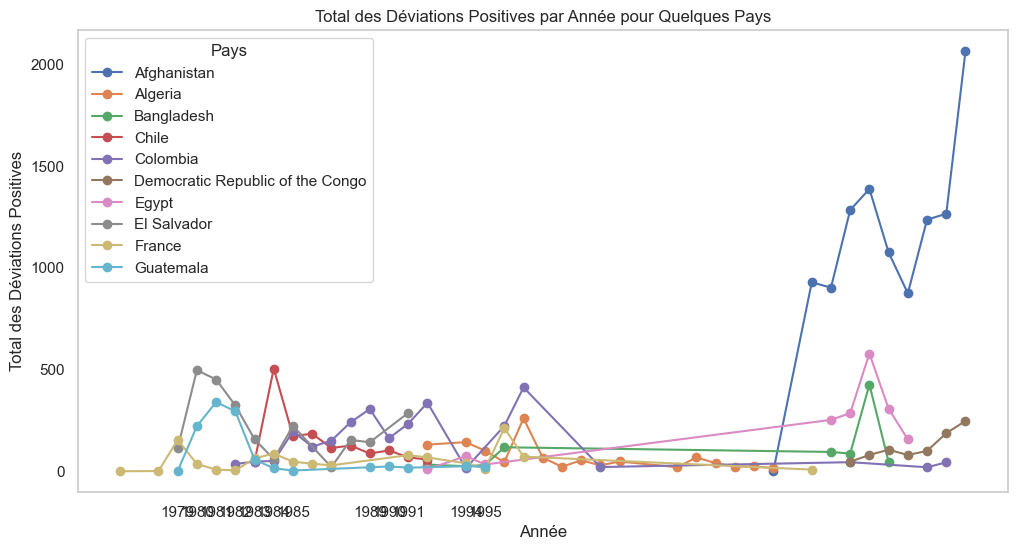

In [104]:
sns.set(style="whitegrid")

# Exemple de pays à visualiser (vous pouvez en choisir d'autres selon vos résultats)
countries_to_plot = high_conflict_countries['country_txt'].unique()[:10]  # Choisir les 5 premiers pays

# Filtrer les données pour ces pays
plot_data = conflict_signs[conflict_signs['country_txt'].isin(countries_to_plot)]

# Créer une figure et un axe
plt.figure(figsize=(12, 6))

# Tracer les déviations positives pour chaque pays
for country in countries_to_plot:
    country_data = plot_data[plot_data['country_txt'] == country]
    plt.plot(country_data['iyear'], country_data['total_positive_deviation'], marker='o', label=country)

# Ajouter des labels et un titre
plt.title('Total des Déviations Positives par Année pour Quelques Pays')
plt.xlabel('Année')
plt.ylabel('Total des Déviations Positives')
plt.xticks(country_data['iyear'].unique())  # Afficher toutes les années sur l'axe x
plt.legend(title='Pays')
plt.grid()

# Afficher le graphique
plt.show()

In [ ]:
# print india data
india_data = data[data['country_txt'] == 'India']


,iyear,country_txt,num_attacks,mean_attacks,deviation
0,1970,Argentina,21,19.209302,1.790698
1,1970,Australia,1,3.636364,-2.636364
2,1970,Belgium,1,4.351351,-3.351351
3,1970,Bolivia,1,10.187500,-9.187500
4,1970,Brazil,6,7.195122,-1.195122
